In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm


In [21]:
startup = pd.read_csv('/content/50_Startups.csv')
startup

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [22]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [23]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [24]:
sup=startup.rename({'R&D Spend':'RDS','Marketing Spend':'MarketSpend','Administration':'Admi'},axis=1)

In [25]:
sup[sup.duplicated()]

,RDS,Admi,MarketSpend,State,Profit


In [26]:
sup.corr()

<ipython-input-26-c15366c9163e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sup.corr()


,RDS,Admi,MarketSpend,Profit
RDS,1.000000,0.241955,0.724248,0.972900
Admi,0.241955,1.000000,-0.032154,0.200717
MarketSpend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [27]:
sup.isna().sum()

RDS            0
Admi           0
MarketSpend    0
State          0
Profit         0
dtype: int64

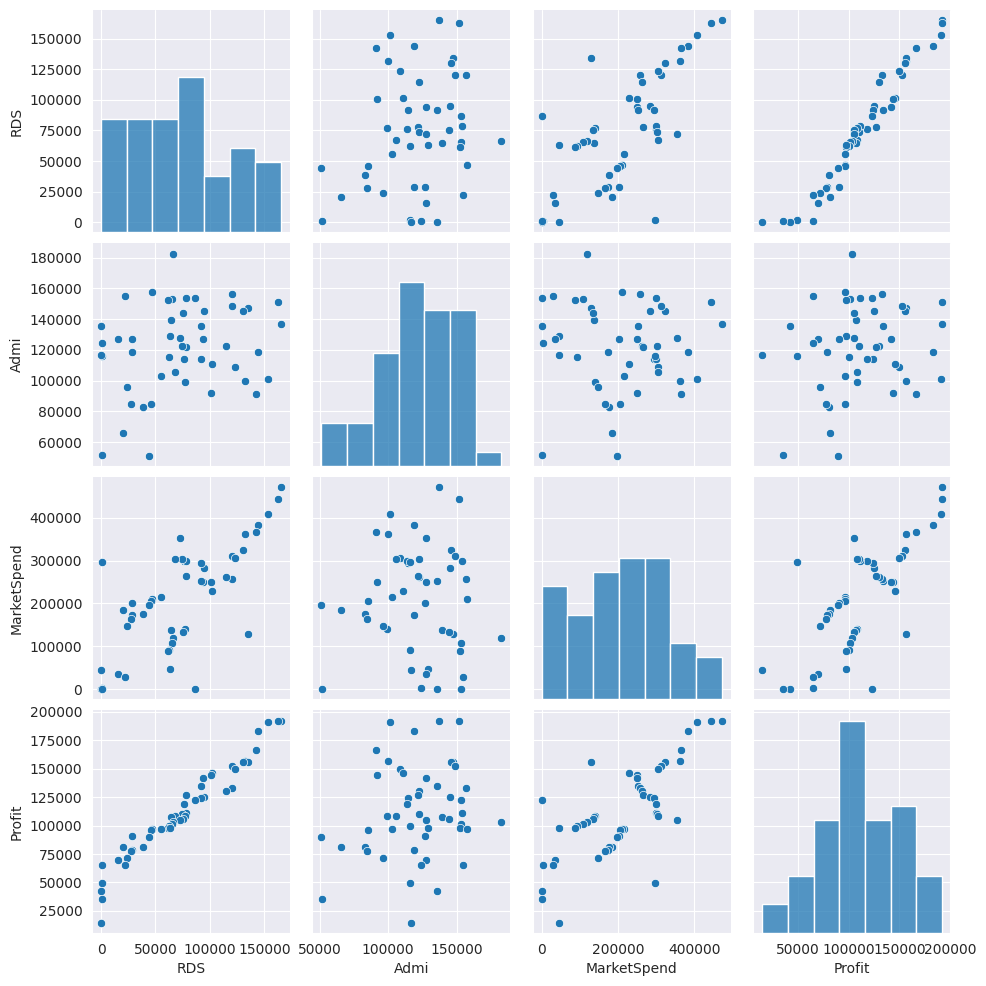

In [28]:
sns.set_style(style='darkgrid')
sns.pairplot(sup)

# Preparing a Model

In [29]:
model = smf.ols("Profit ~	RDS + Admi + MarketSpend ",data=sup).fit()

In [30]:
model.params

Intercept      50122.192990
RDS                0.805715
Admi              -0.026816
MarketSpend        0.027228
dtype: float64

In [31]:
print(np.round(model.pvalues,5),'\n',model.tvalues)

Intercept      0.00000
RDS            0.00000
Admi           0.60176
MarketSpend    0.10472
dtype: float64 
 Intercept       7.626218
RDS            17.846374
Admi           -0.525507
MarketSpend     1.655077
dtype: float64


In [32]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [33]:
rsq_RDS = smf.ols('RDS~Admi+MarketSpend',data = sup).fit().rsquared
vif_RDS = 1/(1-rsq_RDS)

rsq_Admi = smf.ols('Admi~RDS+MarketSpend',data = sup).fit().rsquared
vif_Admi = 1/(1-rsq_Admi)

rsq_MarketSpend = smf.ols('MarketSpend~RDS+Admi',data = sup).fit().rsquared
vif_MarketSpend = 1/(1-rsq_MarketSpend)

s = {'Variable':['RDS','Admi','MarketSpend'],'R^2Value':[rsq_RDS,rsq_Admi,rsq_MarketSpend]}
rsq = pd.DataFrame(s)
rsq

,Variable,R^2Value
0,RDS,0.594962
1,Admi,0.149002
2,MarketSpend,0.570220


In [34]:
v = {'Variable':['RDS','Admi','MarketSpend'],'ViF':[vif_RDS,vif_Admi,vif_MarketSpend]}
vif = pd.DataFrame(v)
vif

,Variable,ViF
0,RDS,2.468903
1,Admi,1.175091
2,MarketSpend,2.326773


# Subset Selection

In [35]:
model =  smf.ols('Profit~RDS+Admi',data = sup).fit()
print(model.aic,rsq_Admi)

1059.6636934567293 0.1490020823951752


In [36]:
model = smf.ols('Profit~RDS+MarketSpend',data = sup).fit()
print(model.aic,rsq_MarketSpend)

1057.070772191826 0.5702202685282504


In [37]:
# So we are getting the low aic value in the MarketSpend variable therefore we're going to discard the Administration variable. 

Text(0.5, 1.0, 'Normal Q-Q plot of the Residual')

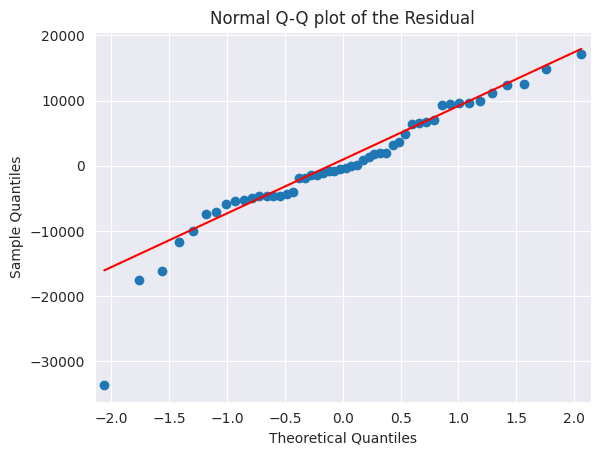

In [38]:
# Q-Q plot

model = smf.ols('Profit~RDS+MarketSpend',data=sup).fit()
qqplot = sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of the Residual")

# Residuals

In [39]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

Text(0, 0.5, 'Cooks distance')

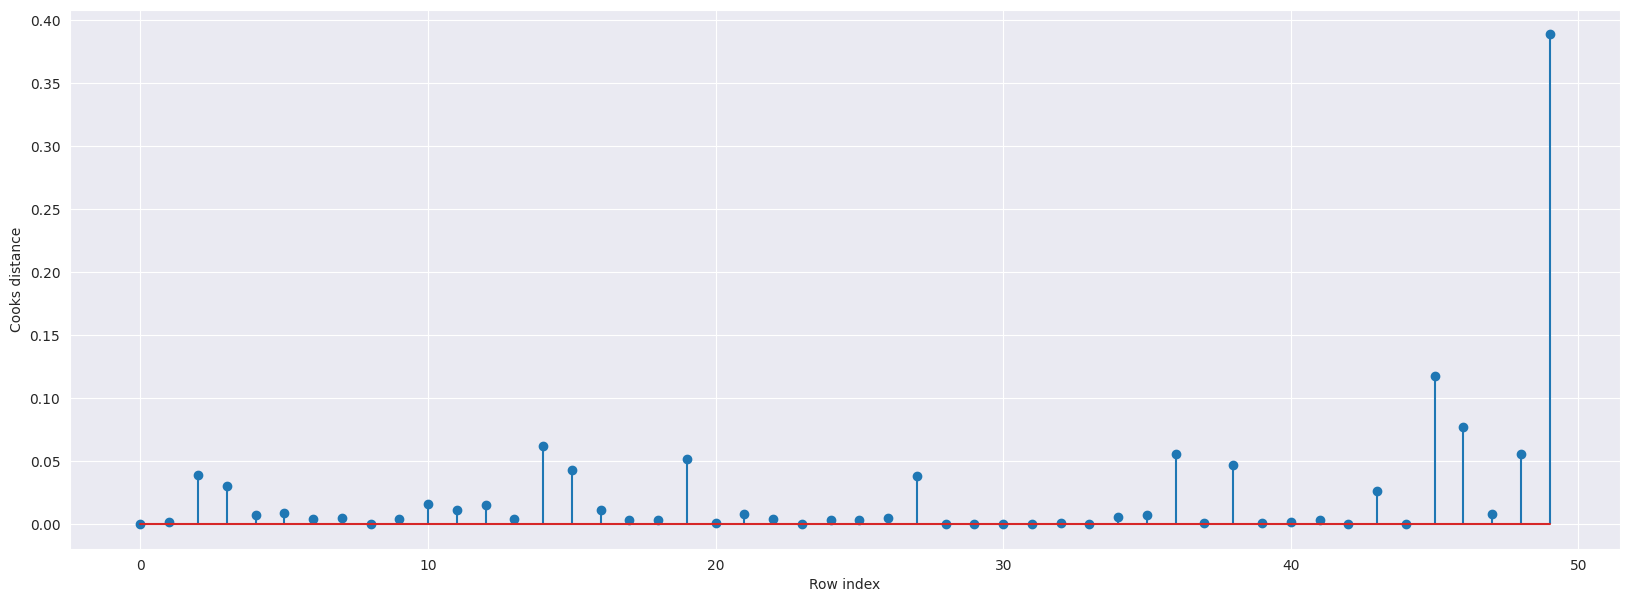

In [40]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(sup)),np.round(c,3))
plt.xlabel("Row index")
plt.ylabel("Cooks distance")

In [41]:
np.argmax(c),np.max(c)

(49, 0.3894886227924922)

In [42]:
sup[sup.index.isin([49])]

,RDS,Admi,MarketSpend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [43]:
supp =sup.drop(sup.index[[49]],axis=0).reset_index(drop=True)
supp

,RDS,Admi,MarketSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [44]:
while np.max(c)>0.5:
  model =smf.ols("Profit~RDS+Admi+MarketSpend",data=supp).fit()
  (c,_) = model_influence.cooks_distance
  c
  np.argmax(c),np.max(c)
  data2 = supp.drop(supp.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
  supp
else: 
   model = smf.ols('Profit~RDS+Admi+MarketSpend',data= supp).fit()
   model.rsquared,model.aic
   print("Thus the model accuracy is improved to '",model.rsquared)  


Thus the model accuracy is improved to ' 0.9613162435129847


# Prediction

In [45]:
wassup = pd.DataFrame({'RDS':65000,"Admi":82000,"MarketSpend":130000},index=[0])
wassup

,RDS,Admi,MarketSpend
0,65000,82000,130000


In [46]:
model.predict(wassup)

0    104737.420078
dtype: float64

In [47]:
pred = model.predict(supp)
pred

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

# ToYota

In [48]:
toyoota = pd.read_csv('/content/ToyotaCorolla.csv',encoding =('ISO-8859-1'),low_memory =False)
toyoota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [49]:
toyota = toyoota.iloc[:,[2,3,6,8,12,13,15,16,17]]
toyota

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [50]:
toyota1=toyota.rename({'Age_08_04':'Age','Quarterly_Tax':'QT'},axis=1)

In [51]:
toyota1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   cc      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   QT      1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [52]:
toyota1.describe()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [53]:
toyota1.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QT,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [54]:
toyota1[toyota1.duplicated()]

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [55]:
toyota2 =toyota1.drop_duplicates().reset_index(drop=True)
toyota2

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [56]:
toyota2.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


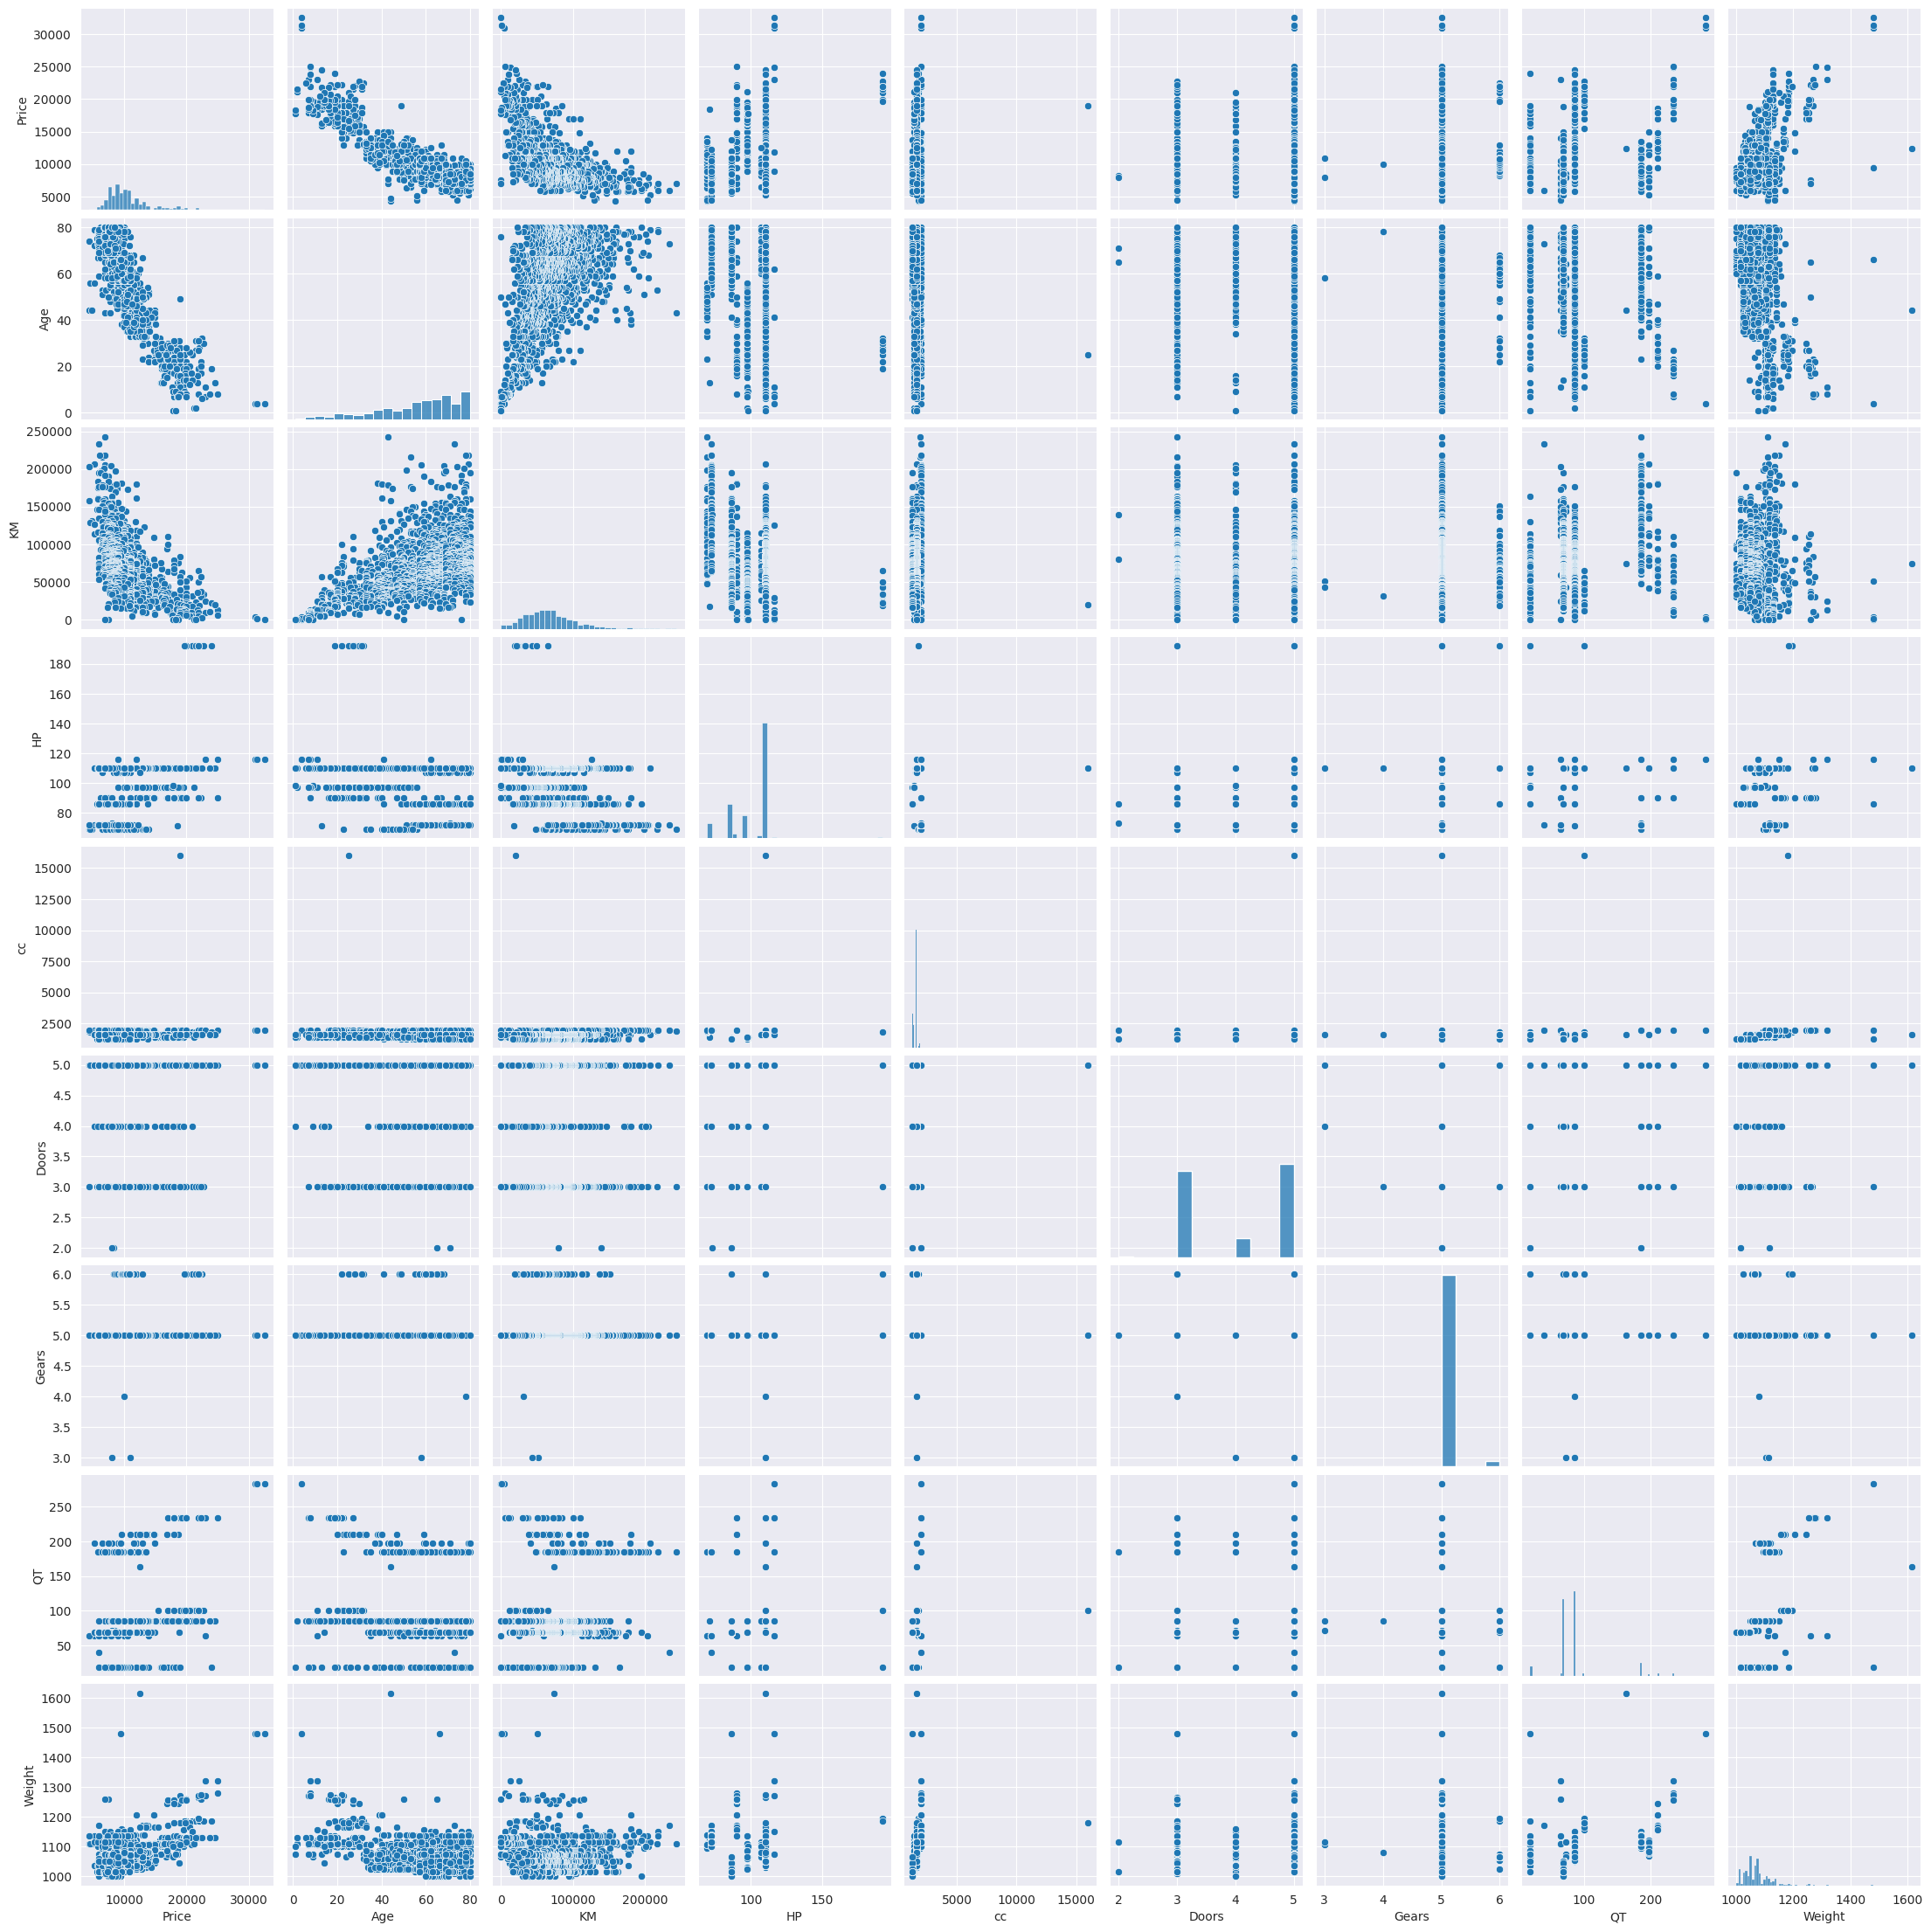

In [57]:
sns.set_style(style ='darkgrid')
sns.pairplot(toyota2)

# Model building

In [58]:
model = smf.ols('Price ~ Age+KM+HP+cc+Doors+Gears+QT+Weight',data=toyota2).fit()

In [59]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
cc             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [60]:
print(model.tvalues,np.round(model.pvalues,5))

Intercept    -3.875273
Age         -46.551876
KM          -16.552424
HP           11.209719
cc           -1.316436
Doors        -0.023012
Gears         3.034563
QT            2.944198
Weight       15.760663
dtype: float64 Intercept    0.00011
Age          0.00000
KM           0.00000
HP           0.00000
cc           0.18824
Doors        0.98164
Gears        0.00245
QT           0.00329
Weight       0.00000
dtype: float64


In [61]:
(model.rsquared,model.rsquared_adj)   # Accuracy is 86.17

(0.8625200256947001, 0.8617487495415147)

In [62]:
c = smf.ols('Price~cc',data=toyota2).fit()
(c.tvalues,c.pvalues)

(Intercept    24.879592
 cc            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 cc            2.292856e-06
 dtype: float64)

In [63]:
d =  smf.ols('Price~Doors',data=toyota2).fit()
("T values",d.tvalues,"P values",d.pvalues)

('T values',
 Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 'P values',
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [64]:
cd =  smf.ols('Price~cc+Doors',data=toyota2).fit()
("T values",cd.tvalues,"P values",cd.pvalues)

('T values',
 Intercept    12.786341
 cc            4.268006
 Doors         6.752236
 dtype: float64,
 'P values',
 Intercept    1.580945e-35
 cc           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

# Model validation

In [65]:
rsq_age = smf.ols('Age~HP+cc+Doors+Gears+Weight+KM',data=toyota2).fit().rsquared
vif_age = 1/(1-rsq_age)

rsq_hp = smf.ols('HP~Age+cc+Doors+Gears+Weight+KM',data=toyota2).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_cc = smf.ols('cc~Age+HP+Doors+Gears+Weight+KM',data=toyota2).fit().rsquared
vif_cc = 1/(1-rsq_cc)

rsq_doors = smf.ols('Doors~Age+HP+cc+Gears+Weight+KM',data=toyota2).fit().rsquared
vif_doors = 1/(1-rsq_doors)

rsq_gears = smf.ols('Gears~Age+HP+cc+Doors+Weight+KM',data=toyota2).fit().rsquared
vif_gears = 1/(1-rsq_gears)

rsq_wt = smf.ols('Weight~Age+HP+cc+Doors+Gears+KM',data=toyota2).fit().rsquared
vif_wt = 1/(1-rsq_wt)

rsq_km = smf.ols('KM~Age+HP+cc+Doors+Gears+Weight',data=toyota2).fit().rsquared
vif_km = 1/(1-rsq_km)


x = {'Variables':['Age','HP','cc','Doors','Gears','WT','KM'],'VIF':[rsq_age,rsq_hp,rsq_cc,rsq_doors,rsq_gears,rsq_wt,rsq_km]}
xx = pd.DataFrame(x)
xx

,Variables,VIF
0,Age,0.464116
1,HP,0.178510
2,cc,0.127494
3,Doors,0.130027
4,Gears,0.088156
5,WT,0.389447
6,KM,0.391977


# Subset selection

In [66]:
model = smf.ols('Price~cc+Age+HP+Gears+Weight+KM',data=toyota2).fit()
(model.aic,rsq_cc)

(24755.16299343978, 0.1274936092532647)

In [67]:
model = smf.ols('Price~Doors+Age+HP+Gears+Weight+KM',data=toyota2).fit()
(model.aic,rsq_doors)

(24756.033306592886, 0.13002744365405838)

In [68]:
# So we are getting low aic value in cc so were going to discard WT i.e weight

Text(0.5, 1.0, 'Normal QQ plot os residuals')

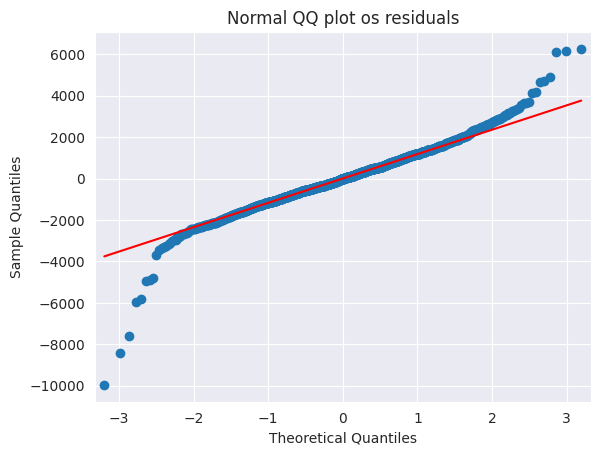

In [69]:
model = smf.ols('Price~cc+Age+HP+Gears+Weight+KM',data=toyota2).fit()
sm.qqplot(model.resid,line='q')
plt.title("Normal QQ plot os residuals")

eval_env: 1


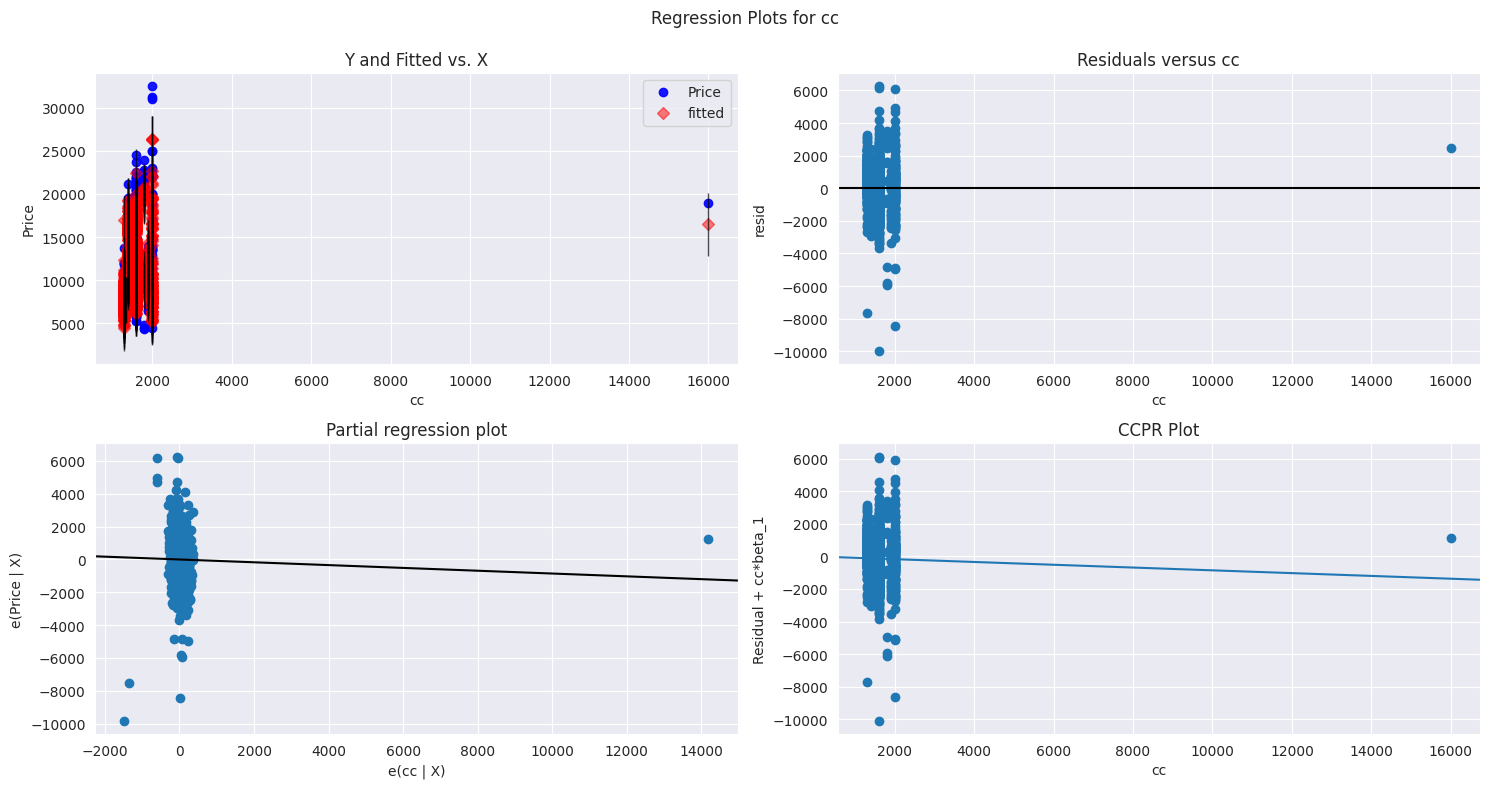

In [70]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model,  "cc", fig=fig)

# Model deletion diagnostic

In [71]:
# Cooks distance

model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

Text(0, 0.5, 'Cooks distance')

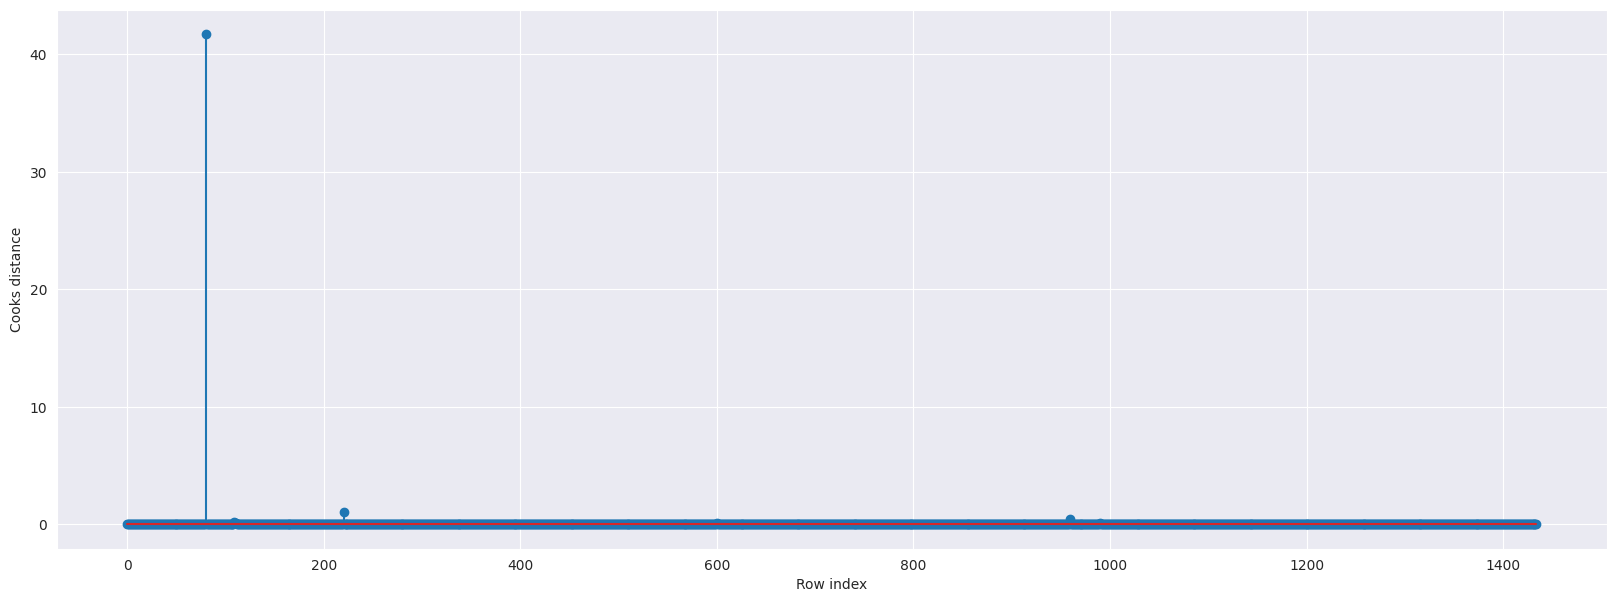

In [72]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyota2)),np.round(c,3))
plt.xlabel("Row index")
plt.ylabel("Cooks distance")

In [73]:
(np.argmax(c),np.max(c))

(80, 41.725814614697676)

In [74]:
toyota2[toyota2.index.isin([80])]

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [75]:
toyota3 = toyota2.drop(toyota2.index[[80]],axis=0).reset_index(drop=True)
toyota3

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [80]:
while np.max(c)>0.5 :
    model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Weight',data=toyota3).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    toyota3=toyota3.drop(toyota3.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    toyota3
else:
    modeel=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Weight',data=toyota3).fit()
    modeel.rsquared , modeel.aic
    print(modeel.rsquared)

0.8882395145171204


In [81]:
if np.max(c)>0.5:
  model = smf.ols('Price~cc+Age+HP+Gears+Weight+KM',data=toyota3).fit()
  (c,_) = model.get_influence().cooks_distance
  c
  np.argmax(c),np.max(c)
  toyota3 =toyota3.drop(toyota3.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
  toyota3
elif np.max(c)<0.5:
   modeel = smf.ols('Price~cc+Age+HP+Gears+Weight+KM',data=toyota3).fit()
   modeel.rsquared,modeel.aic
   print("Thus model accuracy is improved to",modeel.rsquared)

Thus model accuracy is improved to 0.8863421605039981


In [82]:
model.rsquared

0.8839684606741538

In [83]:
toyota3

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1426,7500,69,20544,86,1300,3,5,69,1025
1427,10845,72,19000,86,1300,3,5,69,1015
1428,8500,71,17016,86,1300,3,5,69,1015
1429,7250,70,16916,86,1300,3,5,69,1015


# Prediction

In [84]:
new  = pd.DataFrame({"Age":10,"KM":72937,"HP":86,"cc":1600,"Doors":5,"Gears":3,"QT":69,"Weight":1012},index=[0])
new

,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,10,72937,86,1600,5,3,69,1012


In [85]:
model.predict(new)

0    12127.285209
dtype: float64